# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations

#### Question 2. Create a summary table

In [ ]:
#function

In [6]:
df_raw.describe()

C:\Users\morebeus\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of the GRE is greater than the GPA.

#### Question 4. Drop data points with missing data


In [7]:
df_nona = df_raw.dropna(how='any')

In [8]:
df_nona.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [9]:
null_data = df_raw[df_raw.isnull().any(axis=1)]

In [10]:
null_data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [11]:
df_nona.ix[186:188,]

,admit,gre,gpa,prestige
186,0,560.0,3.61,3.0
188,0,560.0,3.07,2.0


In [12]:
df_nona.ix[211:213,]

,admit,gre,gpa,prestige
211,0,580.0,3.02,2.0
213,0,640.0,3.38,3.0


In [13]:
df_nona.ix[235:237,]

,admit,gre,gpa,prestige
235,0,620.0,3.05,2.0
237,0,480.0,4.00,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Using the formula .ix with the range around the rows shown in the original data.  If the rows are missing in the new data frame then they have been removed.

#### Question 6. Create box plots for GRE and GPA

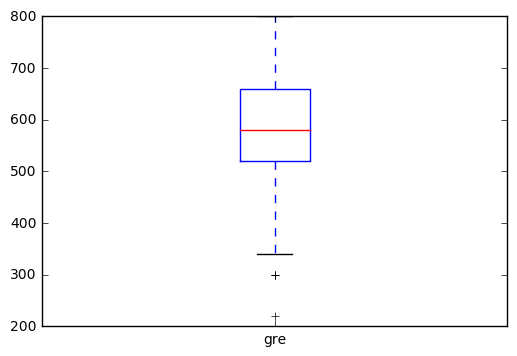

In [14]:
#boxplot 1
df_nona['gre'].plot(kind='box')

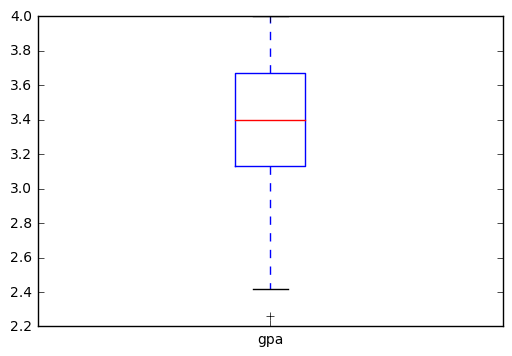

In [15]:
#boxplot 2 
df_nona['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: It shows the range where the data lies and the outliers.

#### Question 8. Describe each distribution 

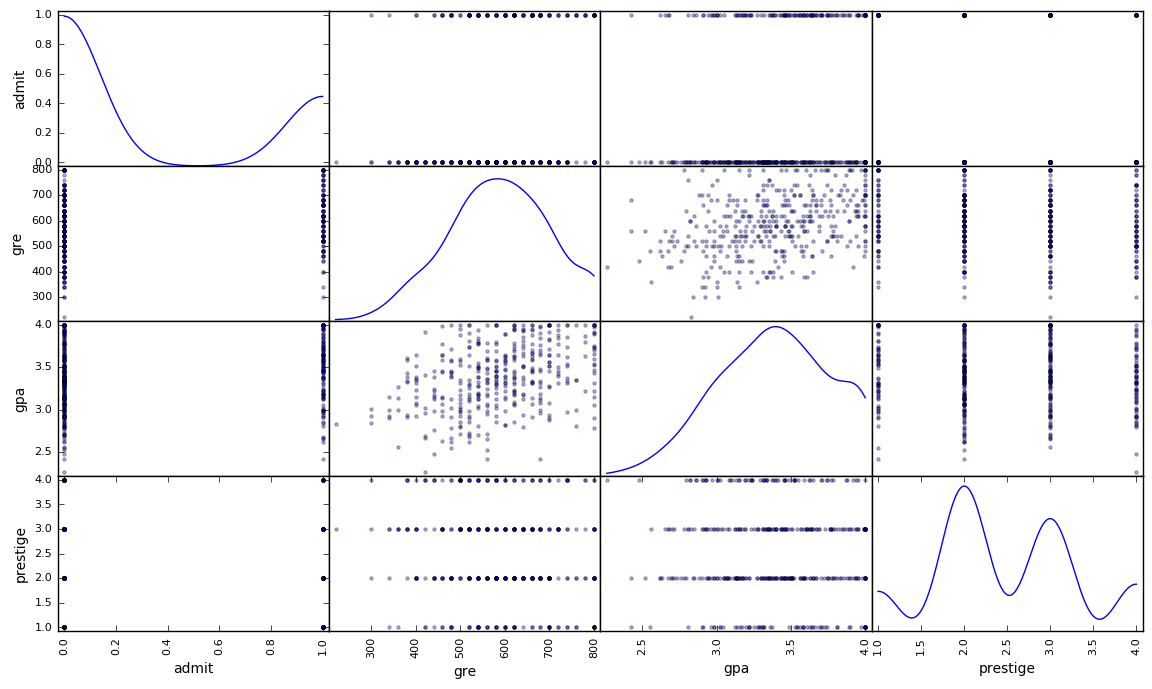

In [17]:
# plot the distribution of each variable 
pd.scatter_matrix(df_nona, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: GRE and GPA look close to a Normal Distribution.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No because predictors GRE and GPA are close to Normal.

#### Question 11. Which of our variables are potentially colinear? 

In [19]:
# create a correlation matrix for the data

df_nona.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: there is some correlation between gre and gpa.  gpa and gre have a negative correlation to prestige.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Take a percentage of admissions based on the prestige the undergraduate school.  Compare them to a confidence interval to see if it is statistically significant.

#### Question 14. What is your hypothesis? 

Answer: A student from a prestigious undergraduate school will likely be admitted into grad school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Imput missing data